In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv('water_potability.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
imputer=SimpleImputer(strategy='constant')

In [7]:
df_=pd.DataFrame(imputer.fit_transform(df))

In [8]:
df_.columns=df.columns

In [9]:
df_.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,0.000000,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,0.000000,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0


In [10]:
df_.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<Axes: >

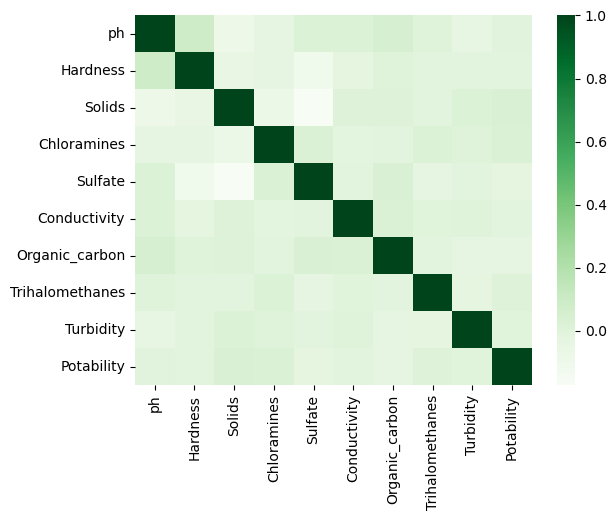

In [11]:
df_corr=df.corr()
sns.heatmap(df_corr, cmap="Greens")

In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', imputer, df_.columns),
    ])

In [13]:
model = RandomForestRegressor(n_estimators=100, random_state=0)

In [14]:
X=df_.drop('Potability',axis=1)
y=df_["Potability"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [15]:
rfc = RandomForestRegressor(n_estimators=600)

In [16]:
rfc.fit(X_train, y_train)

RandomForestRegressor(n_estimators=600)

In [17]:
predictions = rfc.predict(X_test)

In [18]:
print(mean_absolute_error(y_test, predictions))

0.42765497967479676


In [19]:
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('rfc', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))
                             ])

In [20]:
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [0.42463415 0.47917557 0.4460458  0.45560305 0.45215267]


In [21]:
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
0.45152224911562094


In [36]:
my_model = XGBRegressor(n_estimators=100000, learning_rate=0.05, n_jobs=10)
my_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1, n_jobs=10,
             num_parallel_tree=None, random_state=None, ...)

In [37]:
predictions = my_model.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error: 0.47133113007719923


In [39]:
my_model = XGBClassifier(n_estimators=100000, learning_rate=0.05, n_jobs=10)
my_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100000, n_jobs=10,
              num_parallel_tree=None, random_state=None, ...)

In [43]:
predictions = my_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

In [46]:
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.6234756097560976

Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.76      0.72       412
         1.0       0.49      0.39      0.44       244

    accuracy                           0.62       656
   macro avg       0.59      0.58      0.58       656
weighted avg       0.61      0.62      0.61       656



In [49]:
clf = DecisionTreeClassifier(random_state=42)

In [50]:
k_folds = KFold(n_splits = 20)

scores = cross_val_score(clf, X, y, cv = k_folds)

In [51]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.68292683 0.55487805 0.56707317 0.61585366 0.2804878  0.58536585
 0.53658537 0.6097561  0.57317073 0.48780488 0.60365854 0.56097561
 0.48170732 0.61585366 0.37804878 0.67682927 0.5398773  0.58895706
 0.65644172 0.46625767]
Average CV Score:  0.5531254676043693
Number of CV Scores used in Average:  20
